# Dataset Information

   Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.
   
   This is a standard supervised classification task. A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.
   
Variable | Description
----------|--------------
Loan_ID | Unique Loan ID
Gender | Male/ Female
Married | Applicant married (Y/N)
Dependents | Number of dependents
Education | Applicant Education (Graduate/ Under Graduate)
Self_Employed | Self employed (Y/N)
ApplicantIncome | Applicant income
CoapplicantIncome | Coapplicant income
LoanAmount | Loan amount in thousands
Loan_Amount_Term | Term of loan in months
Credit_History | credit history meets guidelines
Property_Area | Urban/ Semi Urban/ Rural
Loan_Status | Loan approved (Y/N)

## Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

## Loading the dataset

In [2]:
df = pd.read_csv('Loan Prediction Dataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe() # get to know the numerical data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.info() # get to know filling of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Preprocessing the dataset

In [5]:
df.isnull().sum() # find the null values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# for categorical data, fill in the most frequent features (mode)
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

# for numerical data, fill in the mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [7]:
df.isnull().sum() # check if the filling null goes well 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory Data Analysis

__1. Categorical attributes visualization__

/var/folders/c1/fr_6s6qj7y117kgys6htgcnw0000gn/T/ipykernel_8786/534512725.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='viridis')


<Axes: xlabel='Gender', ylabel='count'>

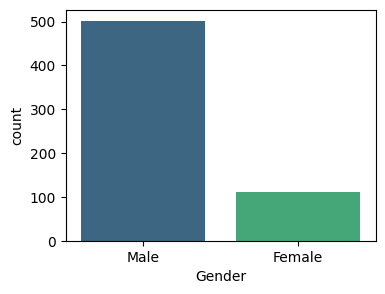

In [8]:
# create a bar plot to represent the count of observations in each category of a categorical variable.
plt.figure(figsize=(4, 3))
sns.countplot(x='Gender', data=df, palette='viridis')

/var/folders/c1/fr_6s6qj7y117kgys6htgcnw0000gn/T/ipykernel_8786/2909468189.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Married', data=df, palette='viridis')


<Axes: xlabel='Married', ylabel='count'>

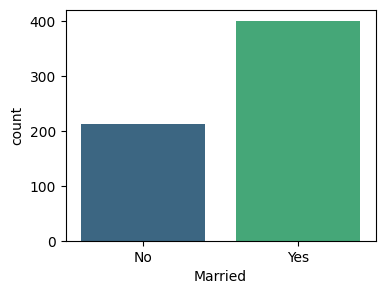

In [9]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Married', data=df, palette='viridis')

/var/folders/c1/fr_6s6qj7y117kgys6htgcnw0000gn/T/ipykernel_8786/877451830.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dependents', data=df, palette='viridis')


<Axes: xlabel='Dependents', ylabel='count'>

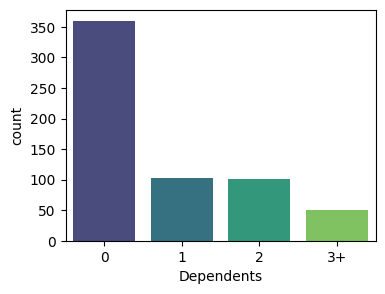

In [10]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Dependents', data=df, palette='viridis')

/var/folders/c1/fr_6s6qj7y117kgys6htgcnw0000gn/T/ipykernel_8786/4194031840.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=df, palette='viridis')


<Axes: xlabel='Education', ylabel='count'>

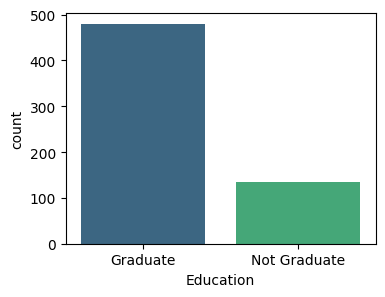

In [11]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Education', data=df, palette='viridis')

/var/folders/c1/fr_6s6qj7y117kgys6htgcnw0000gn/T/ipykernel_8786/1582956587.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Property_Area', data=df, palette='viridis')


<Axes: xlabel='Property_Area', ylabel='count'>

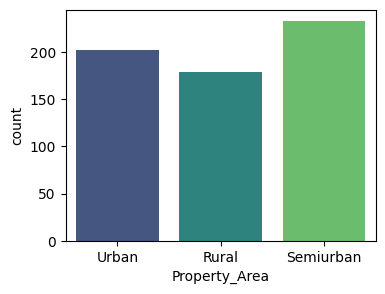

In [12]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Property_Area', data=df, palette='viridis')

/var/folders/c1/fr_6s6qj7y117kgys6htgcnw0000gn/T/ipykernel_8786/771460865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Status', data=df, palette='viridis')


<Axes: xlabel='Loan_Status', ylabel='count'>

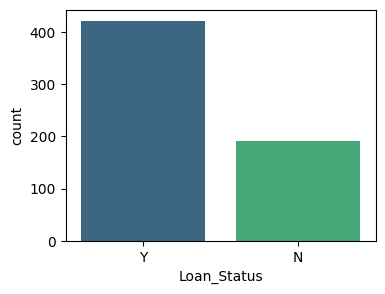

In [13]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Loan_Status', data=df, palette='viridis')

__2. Numerical Data Visualization__ \
to see if we need to handle the distribution or other operations on data

/var/folders/c1/fr_6s6qj7y117kgys6htgcnw0000gn/T/ipykernel_8786/817900804.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'], kde=False)


<Axes: xlabel='ApplicantIncome'>

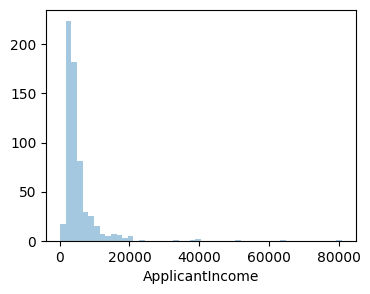

In [14]:
plt.figure(figsize=(4, 3))
sns.distplot(df['ApplicantIncome'], kde=False)

/var/folders/c1/fr_6s6qj7y117kgys6htgcnw0000gn/T/ipykernel_8786/537299330.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'], kde=False)


<Axes: xlabel='CoapplicantIncome'>

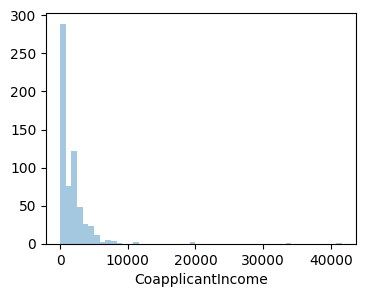

In [15]:
plt.figure(figsize=(4, 3))
sns.distplot(df['CoapplicantIncome'], kde=False)

/var/folders/c1/fr_6s6qj7y117kgys6htgcnw0000gn/T/ipykernel_8786/1866244549.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'],kde=False)


<Axes: xlabel='LoanAmount'>

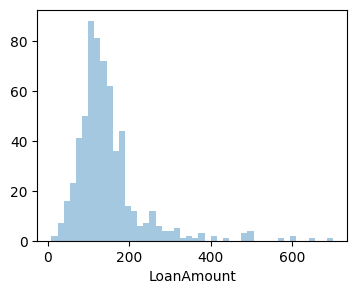

In [16]:
plt.figure(figsize=(4, 3))
sns.distplot(df['LoanAmount'],kde=False)

/var/folders/c1/fr_6s6qj7y117kgys6htgcnw0000gn/T/ipykernel_8786/4182167244.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Loan_Amount_Term'], kde=False)


<Axes: xlabel='Loan_Amount_Term'>

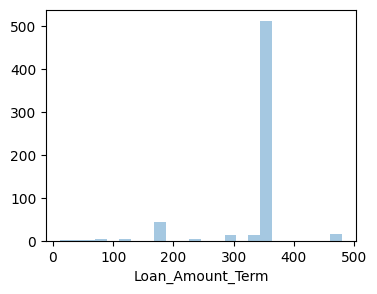

In [17]:
plt.figure(figsize=(4, 3))
sns.distplot(df['Loan_Amount_Term'], kde=False)

/var/folders/c1/fr_6s6qj7y117kgys6htgcnw0000gn/T/ipykernel_8786/1536683781.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Credit_History'], kde=False)


<Axes: xlabel='Credit_History'>

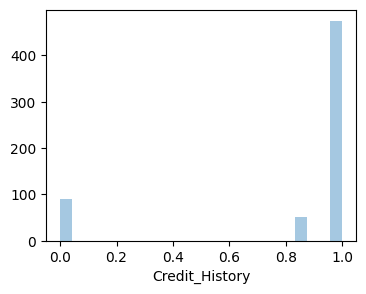

In [18]:
plt.figure(figsize=(4, 3))
sns.distplot(df['Credit_History'], kde=False)

## Creation of new attributes

In [19]:
# for each ID, the sum of this two income might play a role
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


## Log Transformation

/var/folders/c1/fr_6s6qj7y117kgys6htgcnw0000gn/T/ipykernel_8786/3874483346.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncomeLog'])


<Axes: xlabel='ApplicantIncomeLog', ylabel='Density'>

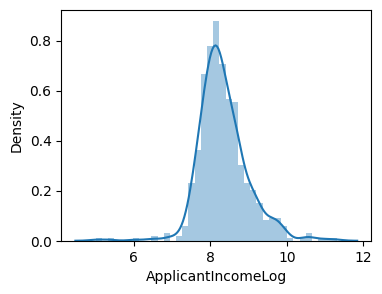

In [20]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'] + 1)
plt.figure(figsize=(4, 3))
sns.distplot(df['ApplicantIncomeLog'])

/var/folders/c1/fr_6s6qj7y117kgys6htgcnw0000gn/T/ipykernel_8786/2171829307.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncomeLog'])


<Axes: xlabel='CoapplicantIncomeLog', ylabel='Density'>

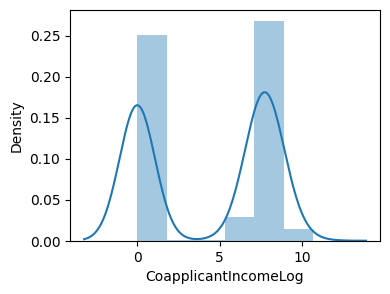

In [21]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'] + 1)
plt.figure(figsize=(4, 3))
sns.distplot(df['CoapplicantIncomeLog'])

/var/folders/c1/fr_6s6qj7y117kgys6htgcnw0000gn/T/ipykernel_8786/2998589311.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmountLog'])


<Axes: xlabel='LoanAmountLog', ylabel='Density'>

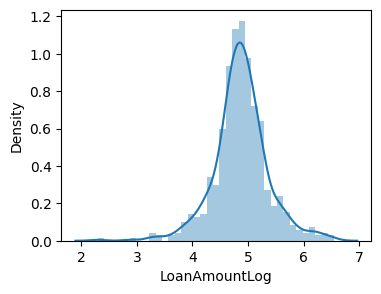

In [22]:
df['LoanAmountLog'] = np.log(df['LoanAmount'] + 1)
plt.figure(figsize=(4, 3))
sns.distplot(df['LoanAmountLog'])

/var/folders/c1/fr_6s6qj7y117kgys6htgcnw0000gn/T/ipykernel_8786/1743239347.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Loan_Amount_TermLog'])


<Axes: xlabel='Loan_Amount_TermLog', ylabel='Density'>

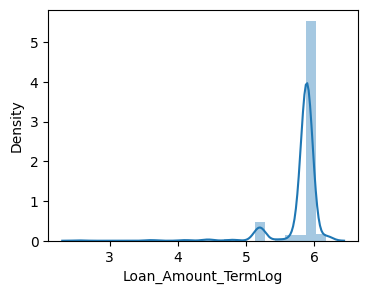

In [23]:
df['Loan_Amount_TermLog'] = np.log(df['Loan_Amount_Term'] + 1)
plt.figure(figsize=(4, 3))
sns.distplot(df['Loan_Amount_TermLog'])

/var/folders/c1/fr_6s6qj7y117kgys6htgcnw0000gn/T/ipykernel_8786/1276917304.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TotalIncomeLog'])


<Axes: xlabel='TotalIncomeLog', ylabel='Density'>

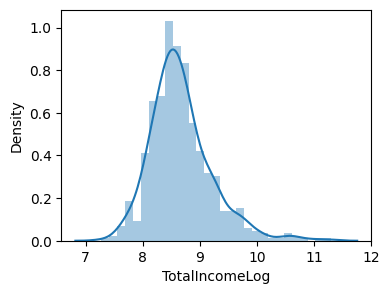

In [24]:
df['TotalIncomeLog'] = np.log(df['TotalIncome'] + 1)
plt.figure(figsize=(4, 3))
sns.distplot(df['TotalIncomeLog'])

In [25]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,TotalIncomeLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197,0.000000,4.993232,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430327,7.319202,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701,0.000000,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.857094,7.765993,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681,0.000000,4.955827,5.888878,8.699681


## Coorelation Matrix

<Axes: >

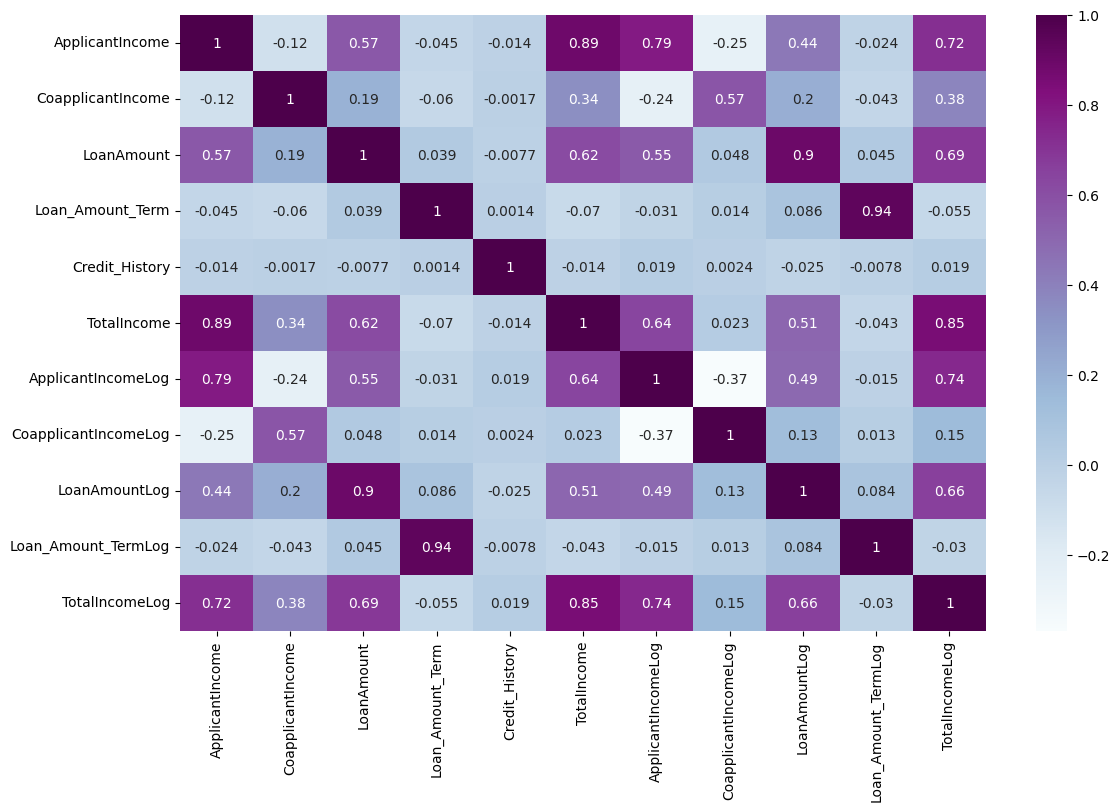

In [26]:
numerical_df = df.select_dtypes(include='number')
corr = numerical_df.corr()
plt.figure(figsize=(13,8))
sns.heatmap(corr, annot=True, cmap='BuPu')

In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,TotalIncomeLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197,0.000000,4.993232,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430327,7.319202,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701,0.000000,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.857094,7.765993,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681,0.000000,4.955827,5.888878,8.699681


In [28]:
# # drop unneccesary columns 
unneccesarys = ['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome','CoapplicantIncomeLog', 'LoanAmount', 'Loan_Amount_Term','TotalIncome']
df = df.drop(columns=unneccesarys, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,TotalIncomeLog
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.993232,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


## Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Gender', 'Married', 'Dependents','Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()

for ca in categorical_columns:
    df[ca] = le.fit_transform(df[ca])

In [30]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,TotalIncomeLog
0,1,0,0,0,0,1.0,2,1,8.674197,4.993232,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


## Train-Test Split

In [31]:
# specify X and y
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

## Model Training

In [33]:
# build classify for feeding in different models

from sklearn.model_selection import cross_val_score

def classify(mode, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy:", model.score(x_test, y_test)*100)
    
    # try cross validation on limited dataset
    # cv = 5, train = 4, test = 1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross Validation Score:", np.mean(score)*100)

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy: 77.27272727272727
Cross Validation Score: 80.9462881514061


In [35]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy: 73.37662337662337
Cross Validation Score: 70.03598560575769


In [36]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy: 77.27272727272727
Cross Validation Score: 78.83246701319473


In [37]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy: 74.02597402597402
Cross Validation Score: 76.55337864854059


## Hyperparameter tuning

In [38]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy: 76.62337662337663
Cross Validation Score: 80.45715047314408


## Confusion Matrix

In [39]:
# find out where the errors come
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[23, 31],
       [ 5, 95]])

<Axes: >

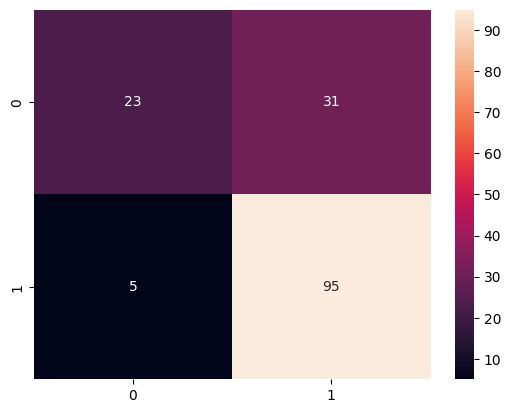

In [41]:
sns.heatmap(cm, annot=True)